In [2]:
# Import essential libraries
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Additional libraries for data preprocessing and visualization
import pandas as pd
import seaborn as sns

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Libraries for building and training the CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image



In [3]:
import os
import numpy as np
from PIL import Image

# Path to the folder containing the subdirectories with PNG images
folder_path = r'D:\Project Files\ADNI'

# List to store image data
images = []

# Set a common image size (e.g., 256x256 pixels)
common_size = (256, 256)

# Loop through the main folder and subfolders
for root, dirs, files in os.walk(folder_path):  # This will walk through all directories and files
    for file_name in files:
        if file_name.lower().endswith('.png'):  # Check for PNG files in any subdirectory
            image_path = os.path.join(root, file_name)
            try:
                image = Image.open(image_path)
                image = image.resize(common_size)  # Resize the image to the common size
                image_data = np.array(image)
                images.append(image_data)
                print(f"Loaded {file_name} with shape {image_data.shape} from {root}")
            except Exception as e:
                print(f"Could not load {file_name}: {e}")

# Convert list to NumPy array
images = np.array(images)
print(f"Total images loaded: {len(images)}")


Loaded AD002_S_0816a076.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a077.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a078.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a079.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a080.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a081.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a082.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a083.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a084.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a085.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a086.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a087.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a088.png with shape (

In [4]:
# Initialize an empty list to store images
images = []

# Initialize an empty list to store labels
labels = []

# Loop through the main folder and subfolders
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.lower().endswith('.png'):
            image_path = os.path.join(root, file_name)
            try:
                image = Image.open(image_path)
                image = image.resize(common_size)  # Resize the image to the common size
                image_data = np.array(image)
                images.append(image_data)  # Append to the list
               
                # Extract label from folder name
                label = os.path.basename(root)  # This assumes the folder name is the label
                labels.append(label)  # Append the label
                
                print(f"Loaded {file_name} with shape {image_data.shape} from {root}, label: {label}")
            except Exception as e:
                print(f"Could not load {file_name}: {e}")

# Convert lists to NumPy arrays after the loop
images = np.array(images)
labels = np.array(labels)
print(f"Total images loaded: {len(images)}, Total labels: {len(labels)}")


Loaded AD002_S_0816a076.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a077.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a078.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a079.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a080.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a081.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a082.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a083.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a084.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a085.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a086.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels (e.g., 'AD' -> 0, 'CI' -> 1, 'CN' -> 2)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical format for multi-class classification
labels_categorical = to_categorical(labels_encoded)

print(f"Encoded labels: {labels_encoded}")
print(f"Categorical labels: {labels_categorical}")


Encoded labels: [0 0 0 ... 2 2 2]
Categorical labels: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Normalize the image data (scale pixel values from 0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (4123, 256, 256), Testing set: (1031, 256, 256)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Add convolutional layers and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # Input shape based on image size
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # Flatten the 3D feature maps to 1D vectors

# Add dense (fully connected) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))  # Output layer for the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


d:\Applications\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
print(X_train.shape)

(4123, 256, 256)


In [10]:
# If your images are grayscale
X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)  # Add channels dimension

# If your images are RGB
# X_train = X_train.reshape(X_train.shape[0], 256, 256, 3)  # Uncomment if images are RGB


In [12]:
# Build the CNN model
model = Sequential()

# Adjust the input shape for grayscale images (256x256x1)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))  # Input shape for grayscale images
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # Flatten the 3D feature maps to 1D vectors

# Add dense (fully connected) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer for multi-class classification
model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,787 (56.61 MB)

 Trainable params: 14,838,787 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Reshape images to include the channel dimension (for grayscale images)
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)


In [14]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 47s 419ms/step - accuracy: 0.4927 - loss: 1.0913 - val_accuracy: 0.7030 - val_loss: 0.7331
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - accuracy: 0.7025 - loss: 0.6635 - val_accuracy: 0.9018 - val_loss: 0.2813
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 47s 454ms/step - accuracy: 0.8838 - loss: 0.3079 - val_accuracy: 0.9697 - val_loss: 0.1314
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 413ms/step - accuracy: 0.9169 - loss: 0.2169 - val_accuracy: 0.9867 - val_loss: 0.0492
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 415ms/step - accuracy: 0.9610 - loss: 0.0995 - val_accuracy: 0.9842 - val_loss: 0.0360
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 404ms/step - accuracy: 0.9679 - loss: 0.0809 - val_accuracy: 0.9939 - val_loss: 0.0208
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 406ms/step - accuracy: 0.9818 - loss: 0.0588 - val_accuracy: 0.9939 - val_loss: 0.0208
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 405ms/step - accuracy: 0.9862 - loss: 0

In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9983 - loss: 0.0105
Test Accuracy: 99.81%
Test Loss: 0.0095


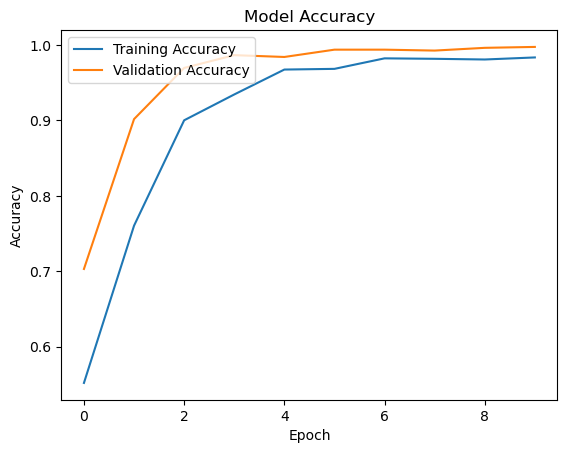

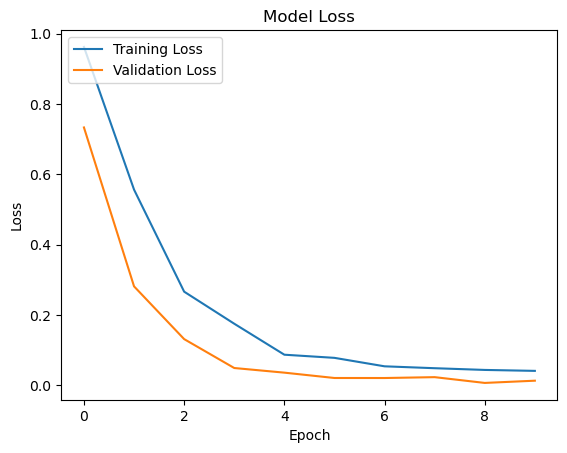

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [17]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"Predicted classes: {predicted_classes}")
print(f"True classes: {true_classes}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Predicted classes: [2 0 1 ... 1 1 1]
True classes: [2 0 1 ... 1 1 1]
